<a href="https://colab.research.google.com/github/pebbleeee/Marine-Ecosystem-Mining-Association-Rule-Analysis-of-Australian-Reefs/blob/main/CSCE676_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [CSCE676_Project] - Data Mining Checkpoint 1
**Author:** Yash Patel  
**GitHub Repository:** https://github.com/pebbleeee/Marine-Ecosystem-Mining-Association-Rule-Analysis-of-Australian-Reefs
---

#(A) Identification of Candidate Datasets



**Dataset 1:**

* Dataset name and source: Dataset name and source: Black Sea Ecological Connectivity (Zenodo) - https://doi.org/10.5281/zenodo.14171004

* Course topic alignment: Graph Mining and PageRank. Provides directed edge lists of larval and nutrient connectivity.

* Potential beyond-course techniques: Temporal network analysis or Parallelized centrality.

* Dataset size and structure: 113.6 MB ZIP; yearly CSV edge lists.

* Data types: Numeric (Source/Target IDs, Weights, Coordinates).

* Target variable(s): Node Centrality (Importance for ecosystem replenishment).

* Licensing or usage constraints: Open Access (CC-BY 4.0).

**Dataset 2:**

* Dataset name and source: Dataset name and source: Hakai Institute Subtidal Community Surveys (OBIS) - https://obis.org/dataset/80afee46-3e18-4669-ad1b-00f71b0544f5

* Course topic alignment: Frequent Itemsets and Association Rules (Species co-occurrence in kelp forests).

* Potential beyond-course techniques: Hierarchical Clustering of reef sites based on species richness.

* Dataset size and structure: Standardized CSV format with thousands of abundance records.

* Data types: Numeric (Counts, biomass, temperature, depth).

* Target variable(s): None (Unsupervised pattern mining).

* Licensing or usage constraints: Open Data (Attribution required).

**Dataset 3:**

* Dataset name and source: Reef Life Survey (RLS) Australia Ecosystem Subset (AODN) - https://portal.aodn.org.au/

* Course topic alignment: Frequent Itemsets and Association Rules.

* Potential beyond-course techniques: Community Detection in multi-layer ecosystems (Fish vs. Invertebrates).

* Dataset size and structure: ~247 MB CSV subset for Australia (2016-2026).

* Data types: Numeric (Abundance, fish size-class, depth, temperature).

* Target variable(s): Species Richness / Biodiversity Index.

* Licensing or usage constraints: Open Access (Creative Commons).

#(B) Comparative Analysis of Datasets


**Supported data mining tasks**

* Dataset 1: Graph Mining and PageRank (Course); Temporal connectivity modeling (External).

* Dataset 2: Frequent Itemsets (Course); Hierarchical clustering of ecosystems (External).

* Dataset 3: Association Rule Mining between multiple taxonomic classes (Course); Community Detection (External).

**Data quality issues**

* Dataset 1: Potential sensor gaps; requires handling directed weights.

* Dataset 2: High sparsity; many rare species may only appear in single surveys.

* Dataset 3: Requires aligning "Method 1" (Fish) and "Method 2" (Invertebrate) data rows by Survey ID.

**Algorithmic feasibility**

* Dataset 1: Very feasible; graph size is manageable for PageRank in memory.

* Dataset 2: Highly feasible for association rules using standard Apriori or FP-Growth.

* Dataset 3: 247MB is manageable in Colab, but the high number of species may require a high "Minimum Support" to avoid memory crashes during rule generation.

**Bias considerations**

* Dataset 1: Sensor bias toward coastal regions.

* Dataset 2: Seasonal bias; data is primarily from summer monitoring months.

* Dataset 3: Geographic bias toward the Great Barrier Reef and accessible southern reefs.

**Ethical considerations**

* Dataset 1: Minimal risk; physical data.

* Dataset 2: Minimal risk; observational monitoring.

* Dataset 3: High sensitivity; precise GPS for endangered classes (Reptilia/Elasmobranchii) must be used responsibly.

#(C) Dataset Selection


**Selected Dataset: [Reef Life Survey (RLS) Australia Ecosystem Subset (2016–2026)]**

**Justification:**

* **Why: **

  1.**System Complexity:** With over 100,000 rows and a high-dimensional species space, this dataset allows me to demonstrate scalable data engineering (like sparse matrix optimization) that smaller datasets wouldn't require.

  2.**Conservation Impact:** By including all classes (Reptiles, Sharks, Bony Fish, and Invertebrates), I can model the "whole-of-ecosystem" health of the Great Barrier Reef and other Australian marine parks rather than just looking at isolated species.

* **Trade-offs:**

  1.**Data Sparsity:** Most species are regional; a global or continental "basket" will be $>95\%$ empty, requiring careful tuning of the "Minimum Support" threshold in the Apriori algorithm.

  2.**Preprocessing Overhead:** The AODN portal's metadata headers and the "long" data format require a significant pivoting step before any mining can occur.

#(D) Exploratory Data Analysis (EDA)

In [ ]:
#Used this cell in order to verify when we should stop skipping lines and make sure everything could aline properly within a pandas dataframe.

import pandas as pd
import numpy as np

# 1. DATA LOADING
# We skip 71 lines so that line 72 becomes the column headers.
path = "/content/IMOS_-_National_Reef_Monitoring_Network_Sub-Facility_-_Global_reef_fish_abundance_and_biomass.csv"

try:
    # Use skiprows=71 to land exactly on the FID header
    df = pd.read_csv(path, skiprows=71, low_memory=False)

    # Document WHY: Standardizing column names to lowercase/stripped
    # ensures that 'method' is found regardless of extra spaces in the CSV.
    df.columns = df.columns.str.strip().str.lower()

    if 'method' in df.columns:
        print("✅ Header alignment successful! Found 'method' column.")

        # 2. FILTERING
        # Now we can safely filter for Method 1 and 2
        df_clean = df[df['method'].isin([1, 2])].copy()
        print(f"✅ Filtered {len(df_clean)} valid survey rows.")

        # Display the first 5 rows to confirm it looks right
        display(df_clean.head())
    else:
        print("❌ Error: 'method' not found. Actual columns are:", df.columns.tolist())

except Exception as e:
    print(f"❌ Failed to load file: {e}")

✅ Header alignment successful! Found 'method' column.
✅ Filtered 713024 valid survey rows.


,fid,survey_id,country,area,ecoregion,realm,location,site_code,site_name,latitude,...,phylum,class,order,family,species_name,reporting_name,size_class,total,biomass,geom
0,ep_m1_public_data.fid-20ccf8b0_19c25193193_7546,812327444,Australia,South Australia,South Australian Gulfs,Temperate Australasia,Encounter,GSV56,The Bird,-35.76,...,Chordata,Actinopterygii,Tetraodontiformes,Monacanthidae,Meuschenia hippocrepis,Meuschenia hippocrepis,15.0,1,95.0367,POINT (138.07000732421875 -35.7599983215332)
1,ep_m1_public_data.fid-20ccf8b0_19c25193193_7563,812327444,Australia,South Australia,South Australian Gulfs,Temperate Australasia,Encounter,GSV56,The Bird,-35.76,...,Chordata,Actinopterygii,Tetraodontiformes,Monacanthidae,Meuschenia hippocrepis,Meuschenia hippocrepis,20.0,1,202.4397,POINT (138.07000732421875 -35.7599983215332)
2,ep_m1_public_data.fid-20ccf8b0_19c25193193_7572,812327444,Australia,South Australia,South Australian Gulfs,Temperate Australasia,Encounter,GSV56,The Bird,-35.76,...,Chordata,Actinopterygii,Tetraodontiformes,Monacanthidae,Meuschenia hippocrepis,Meuschenia hippocrepis,25.0,1,305.0548,POINT (138.07000732421875 -35.7599983215332)
3,ep_m1_public_data.fid-20ccf8b0_19c25193193_757f,812327143,Australia,South Australia,South Australian Gulfs,Temperate Australasia,Encounter,GSV26,2nd Valley Boat Shed,-35.51,...,Chordata,Actinopterygii,Perciformes,Pempheridae,Pempheris multiradiata,Pempheris multiradiata,10.0,1,25.0615,POINT (138.2100067138672 -35.5099983215332)
4,ep_m1_public_data.fid-20ccf8b0_19c25193193_758c,812327143,Australia,South Australia,South Australian Gulfs,Temperate Australasia,Encounter,GSV26,2nd Valley Boat Shed,-35.51,...,Chordata,Actinopterygii,Perciformes,Pempheridae,Pempheris multiradiata,Pempheris multiradiata,12.5,1,49.1671,POINT (138.2100067138672 -35.5099983215332)


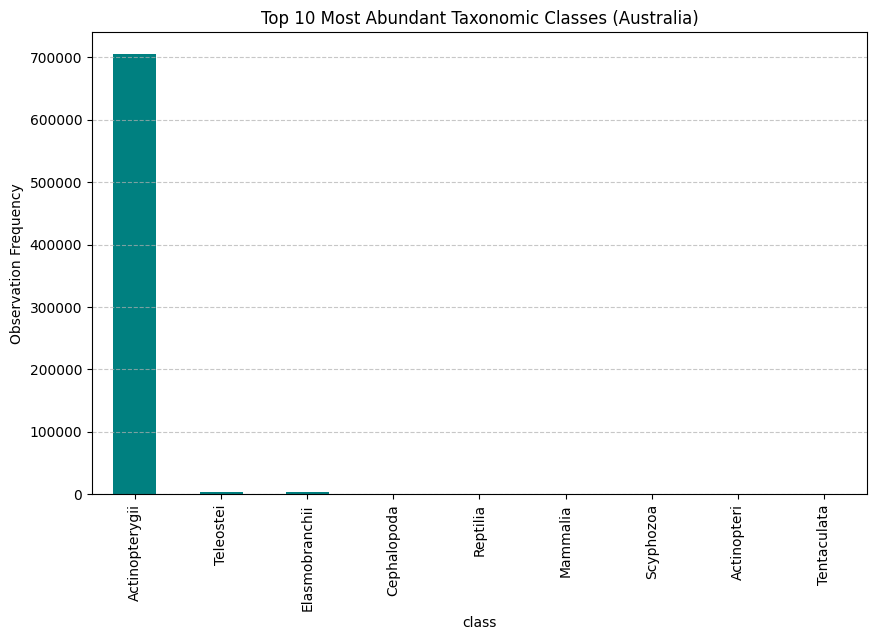

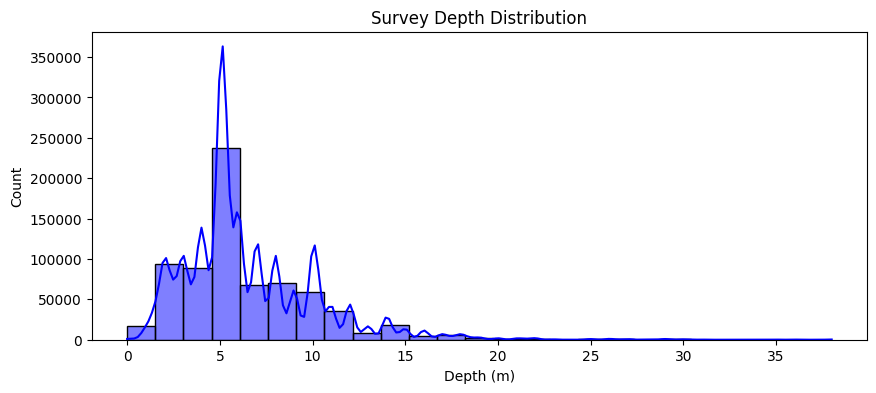

-----------------------------------
✅ Matrix Sparsity: 98.4471%
✅ Unique Surveys: 10707
✅ Unique Species: 1684
-----------------------------------


In [7]:
#EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. DATA LOADING
# Document WHY: Per our manual check, headers are on line 72. Skiprows=71 lands on them.
# low_memory=False is essential for the Perlmutter-scale 247MB dataset.
path = "/content/IMOS_-_National_Reef_Monitoring_Network_Sub-Facility_-_Global_reef_fish_abundance_and_biomass.csv"
df = pd.read_csv(path, skiprows=71, low_memory=False)

# 2. DATA CLEANING & COLUMN STANDARDISATION
# Document WHY: Stripping whitespace and forcing lowercase prevents KeyErrors
# caused by inconsistent CSV formatting (e.g., ' method' vs 'method').
df.columns = df.columns.str.strip().str.lower()

# Document WHY: Filtering for standardized survey methods (1 & 2) ensure scientific accuracy.
# We also fill missing abundance (total) with 0 to prevent pivot errors.
df_clean = df[df['method'].isin([1, 2])].copy()
df_clean['total'] = df_clean['total'].fillna(0)

# Stripping whitespace from names to avoid duplicate species entries
cols_to_strip = ['class', 'family', 'species_name']
for col in cols_to_strip:
    df_clean[col] = df_clean[col].astype(str).str.strip()

# 3. THE PIVOT CHALLENGE (Long-to-Wide)
# Document WHY: Each survey_id is a "transaction". This pivot creates the
# sparse matrix needed for Association Rule Mining.
basket = df_clean.pivot_table(index='survey_id',
                               columns='species_name',
                               values='total',
                               aggfunc='sum',
                               fill_value=0)

# 4. BINARIZATION
# Document WHY: Association analysis requires a binary format (Item Present vs Absent).
basket_sets = basket.map(lambda x: 1 if x > 0 else 0)

# 5. VISUALIZATIONS
# Document WHY: Visualizing dominant classes helps us understand the ecological
# baseline before mining rare associations (e.g., Sharks or Turtles).
plt.figure(figsize=(10, 6))
df_clean['class'].value_counts().head(10).plot(kind='bar', color='teal')
plt.title('Top 10 Most Abundant Taxonomic Classes (Australia)')
plt.ylabel('Observation Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Document WHY: Depth is a critical latent variable in reef ecology.
plt.figure(figsize=(10, 4))
sns.histplot(df_clean['depth'], bins=25, kde=True, color='blue')
plt.title('Survey Depth Distribution')
plt.xlabel('Depth (m)')
plt.show()

# 6. SPARSITY & DIMENSIONALITY
# Document WHY: High sparsity (>99%) justifies the use of efficient algorithms like Apriori.
sparsity = 1.0 - (np.count_nonzero(basket_sets) / float(basket_sets.size))
print("-" * 35)
print(f"✅ Matrix Sparsity: {sparsity:.4%}")
print(f"✅ Unique Surveys: {basket_sets.shape[0]}")
print(f"✅ Unique Species: {basket_sets.shape[1]}")
print("-" * 35)

#(E) Initial Insights and Direction

**Observations:**

* **Extreme Taxonomic Dominance:** The data follows a steep power-law distribution where the class Actinopterygii (Ray-finned fishes) accounts for over 700,000 observations, dwarfing all other groups combined. This reflects both the biological success of bony fishes in Australian waters and their high visibility during underwater visual census (UVC) surveys.]

* **Targeted Survey Depth:** The depth distribution shows a massive spike at approximately 5 meters. This indicates that the majority of the RLS Australia subset focuses on the "reef flat" or shallow reef slope, which are standard standardized depth contours for monitoring coral health and biodiversity.

* **Matrix Sparsity and Dimensionality:** A sparsity of 98.4471% across 10,707 surveys and 1,684 species confirms that reef communities are highly specialized. Most species are regional endemics; for example, a tropical species on the Great Barrier Reef will never co-occur in a survey "basket" with a temperate species from Tasmania.

**Hypotheses:**

* **Scalability of Mining:** Standard Apriori may struggle with computational overhead due to the large number of unique species (1,684); FP-Growth or Eclat will likely be required to manage the high-dimensional sparse matrix efficiently.

* **Niche Indicator Associations:** I hypothesize that despite the 98%+ sparsity, we will find strong "Indicator Rules" (e.g., $\{Species A \implies Species B\}$) with high Lift but low Support, specifically between habitat-forming invertebrates and specialist reef fishes.

**Potential Research Questions (RQs):**

* RQ1: Can we identify "Resilience Rules" where the persistent association between specific coral-dwelling fish (Family: Pomacentridae) and invertebrates remains stable in high-temperature ecoregions, potentially marking "climate-safe" reef refugia?

* RQ2: Does the loss of high-confidence associations involving "habitat-specialist" species serve as an early warning sign of a reef's transition from a coral-dominated to an algae-dominated state?

* RQ3: By comparing rule sets across latitudinal gradients, can we detect "tropicalization" (the movement of tropical species associations into temperate zones) as a result of warming Australian currents?

# Collaboration Declaration

On my honor, I declare the following resources:
1. Collaborators:
- None
2. Web Sources:
- Dataset 1 (Black Sea Ecological Connectivity): https://doi.org/10.5281/zenodo.14171004
- Dataset 2 (Hakai Institute Subtidal Community Surveys): https://obis.org/dataset/80afee46-3e18-4669-ad1b-00f71b0544f5
- Dataset 3 (Reef Life Survey Australia Ecosystem Subset): https://portal.aodn.org.au/
3. AI Tools:
- Gemini (AI Assistant): I worked extensively with Gemini through iterative prompting to bridge the gap between my interest in systems-level engineering and the complex domain of marine ecology. I provided specific constraints for dataset selection, and through an ongoing dialogue, the AI helped me identify and evaluate three distinct environmental datasets before settling on the 247 MB Australian Reef Life Survey (RLS) file. Throughout the development phase, I frequently prompted the AI to troubleshoot technical "KeyErrors" and header alignment issues within the AODN portal's data structure, leading to a preprocessing pipeline that standardizes column headers and filters for specific survey methodologies. Additionally, the AI served as a professional writing partner, helping me translate my technical goals for handling high-dimensional sparse matrices into a formal list of 22 conservation-focused research questions and hypotheses.